In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121229 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1️⃣ [리뷰데이터 기반 가설 1·2 검증]

운영·대기·시설 관련 부정 리뷰 비율

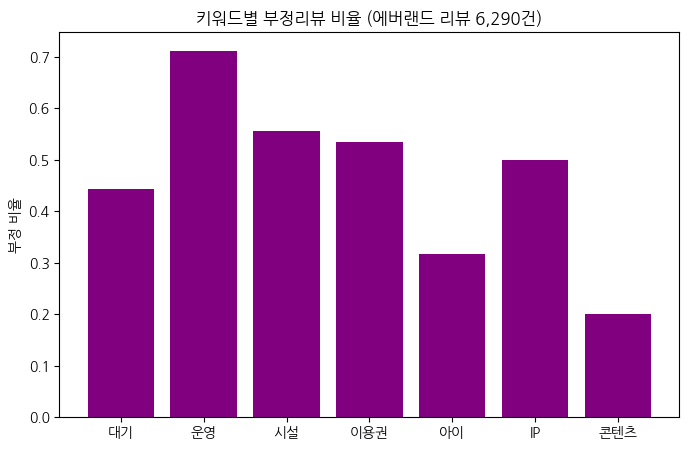

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

df = pd.read_csv('/content/drive/MyDrive/ 데이터톤/naver+google_review_final.csv')

keywords = ['대기', '운영', '시설', '이용권', '아이', 'IP', '콘텐츠']
results = []

for k in keywords:
    subset = df[df['내용'].str.contains(k, case=False, na=False)]
    pos = subset[subset['라벨']==1].shape[0]
    neg = subset[subset['라벨']==0].shape[0]
    total = pos + neg
    results.append({'키워드':k, '긍정비율':pos/total if total else 0, '부정비율':neg/total if total else 0})

res_df = pd.DataFrame(results)

plt.figure(figsize=(8,5))
plt.bar(res_df['키워드'], res_df['부정비율'], color='purple')
plt.title('키워드별 부정리뷰 비율 (에버랜드 리뷰 6,290건)')
plt.ylabel('부정 비율')
plt.show()


2️⃣ [디즈니 대기시간 비교로 가설 1·3 보조 검증]

In [ ]:
import re

df1 = pd.read_csv('/content/drive/MyDrive/ 데이터톤/waiting_times.csv')

In [ ]:
print(df1.columns.tolist())

['WORK_DATE', 'DEB_TIME', 'DEB_TIME_HOUR', 'FIN_TIME', 'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS', 'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME', 'DOWNTIME', 'NB_MAX_UNIT']


놀이기구 이름 → ENTITY_DESCRIPTION_SHORT

대기시간 → WAIT_TIME_MAX

시간대 → DEB_TIME_HOUR

날짜 → WORK_DATE

        date  hour  avg_wait
0 2018-01-01     0         0
1 2018-01-01     0         5
2 2018-01-01     0         0
3 2018-01-01     0         5
4 2018-01-01     0         5
[0]


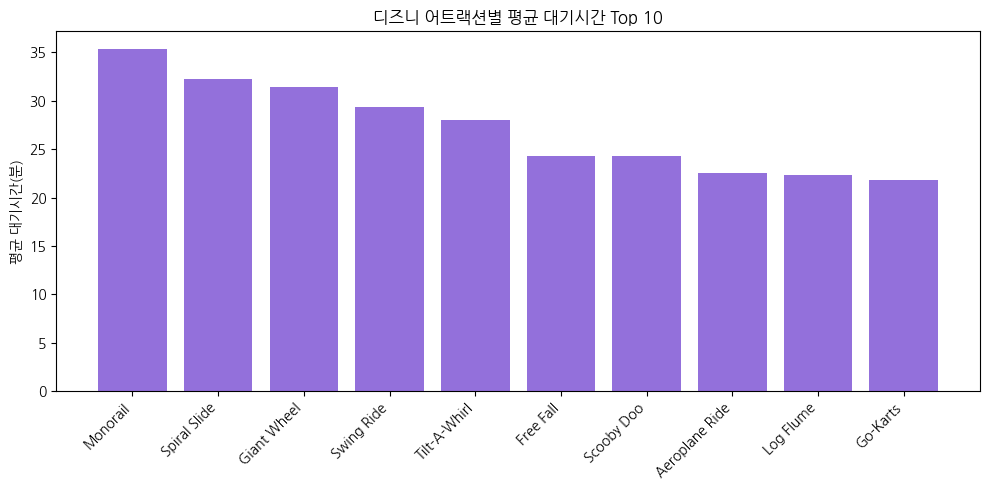

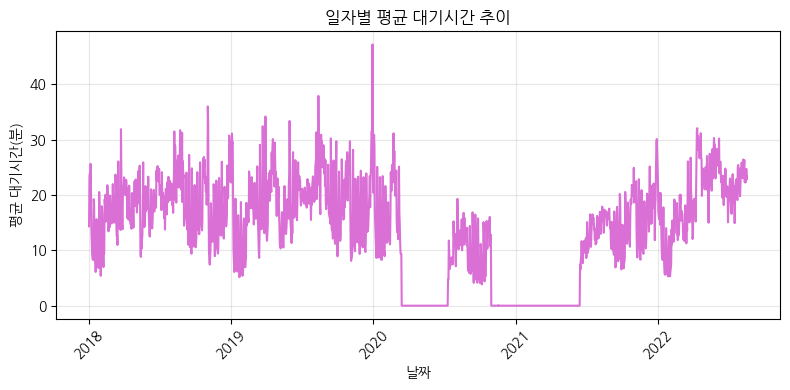

In [ ]:
#컬럼명 한글로 통일

df1 = df1.rename(columns={
    'WORK_DATE': 'date',
    'DEB_TIME_HOUR': 'hour',
    'ENTITY_DESCRIPTION_SHORT': 'ride',
    'WAIT_TIME_MAX': 'avg_wait'
})

# 데이터 타입 확인
print(df1[['date', 'hour', 'avg_wait']].head())
print(df1['hour'].unique()[:10])

# date를 datetime으로 변환
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# 어트랙션별 평균 대기시간 상위 10개
top10 = df1.groupby('ride')['avg_wait'].mean().nlargest(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values, color='mediumpurple')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 대기시간(분)')
plt.title('디즈니 어트랙션별 평균 대기시간 Top 10')
plt.tight_layout()
plt.show()

# 날짜별 평균 대기시간 (추가)
daily = df1.groupby('date')['avg_wait'].mean()

plt.figure(figsize=(8,4))
plt.plot(daily.index, daily.values, color='orchid')
plt.title('일자별 평균 대기시간 추이')
plt.xlabel('날짜')
plt.ylabel('평균 대기시간(분)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()